In [1]:
import pandas as pd
import os
import pymongo
import json
import matplotlib.pyplot as plt
import numpy as np


In [2]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client["project2"]
for x in os.listdir("this_one"):
    df = pd.read_csv(f'this_one/{x}')
    x = x.replace(" ", "_")[:len(x)-4]
    collist = db.list_collection_names()
    records = json.loads(df.T.to_json()).values()
    if x not in collist:
        db[x].insert_many(records)

In [3]:
for x in db.list_collection_names():
    df = pd.DataFrame(list(db[x].find()))
    del df['_id']
# print(db.list_collection_names())
# data = list(db["texas_combined_completed_data"].find())
# print(json.dumps(data, default=str, indent=4))
df = pd.DataFrame(list(db["texas_combined_completed_data"].find()))
del df['_id']

In [4]:
print(df.columns)
death_rate = []
vaccinated_rate = []
for x in range(len(df["Deaths"]) - 1):
    death_rate.append(float(df["Deaths"].tolist()[x + 1] - df["Deaths"].tolist()[x]))
    vaccinated_rate.append(df["People_Fully_Vaccinated"].tolist()[x + 1] - df["People_Fully_Vaccinated"].tolist()[x])
print(death_rate)
print(vaccinated_rate)


Index(['Last_Update', 'Province_State', 'Confirmed', 'Deaths', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'People_Fully_Vaccinated', 'People_Partially_Vaccinated'],
      dtype='object')
[459.0, 451.0, 439.0, 344.0, 186.0, 179.0, 330.0, 457.0, 415.0, 358.0, 274.0, 150.0, 171.0, 374.0, 420.0, 414.0, 440.0, 289.0, 140.0, 160.0, 317.0, 349.0, 387.0, 366.0, 248.0, 124.0, 63.0, 50.0, 110.0, 134.0, 202.0, 209.0, 121.0, 139.0, 220.0, 310.0, 254.0, 291.0, 143.0, 178.0, 212.0, 277.0, 277.0, 294.0, 290.0, 202.0, 66.0, 96.0, 171.0, 214.0, 211.0, 222.0, 137.0, 57.0, 96.0, 132.0, 176.0, 198.0, 173.0, 100.0, 48.0, 100.0, 81.0, 162.0, 133.0, 125.0, 92.0, 54.0, 41.0, 108.0, 10.0, 243.0, 104.0, 77.0, 21.0, 32.0, 86.0, 103.0, 99.0, 104.0, 67.0, 24.0, 19.0, 58.0, 70.0, 82.0, 69.0, 52.0, 33.0, 23.0, 54.0, 76.0, 70.0, 59.0, 44.0, 15.0, 31.0, 60.0, 71.0, 66.0, 55.0, 55.0, 16.0, 41.0, 80.0, 60.0, 56.0, 56.0, 43.0, 17.0, 22.0, 54.0, 66.0, 55.0, 63.0, 37.0, 1.0,

In [5]:
print(len(df))

dr_weekly = []
vr_weekly = []
for x in range(0, 273, 7):
    dr = death_rate[x]
    vr = vaccinated_rate[x]
    for y in range(1, 7):
        dr += death_rate[x+y]
        vr += vaccinated_rate[x+y]
    dr_weekly.append(dr / 7)
    vr_weekly.append(vr / 7 / 100)
print(dr_weekly)
print(vr_weekly)

279
[341.14285714285717, 314.14285714285717, 311.42857142857144, 226.71428571428572, 162.14285714285714, 237.85714285714286, 199.42857142857142, 152.71428571428572, 125.14285714285714, 102.14285714285714, 81.85714285714286, 67.71428571428571, 54.714285714285715, 50.714285714285715, 54.857142857142854, 44.0, 41.857142857142854, 39.42857142857143, 33.857142857142854, 36.0, 27.142857142857142, 26.142857142857142, 22.571428571428573, 28.285714285714285, 26.285714285714285, 25.0, 30.428571428571427, 45.285714285714285, 62.285714285714285, 92.42857142857143, 153.0, 213.57142857142858, 227.71428571428572, 255.0, 282.7142857142857, 293.42857142857144, 266.0, 106.28571428571429, 320.2857142857143]
[174.1185714285714, 321.2742857142857, 453.22857142857146, 530.5714285714286, 395.79571428571427, 819.6, 567.1314285714285, 627.2071428571428, 466.9328571428572, 906.8014285714286, 1332.9242857142858, 1529.6871428571428, 1238.9814285714285, 1110.35, 1050.8842857142856, 1021.7485714285715, 890.39857142

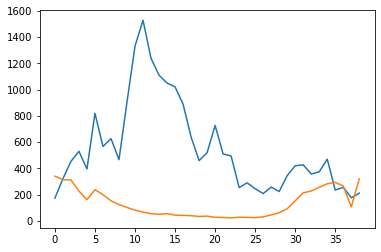

In [6]:
plt.plot(
    np.arange((len(vr_weekly))),
    vr_weekly
)
plt.plot(
    np.arange(len(dr_weekly)),
    dr_weekly
)
plt.show()